In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
appletrackingdata = pd.read_csv('/content/drive/My Drive/c3ai_datasets/applemobilitytrends-2020-09-30.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


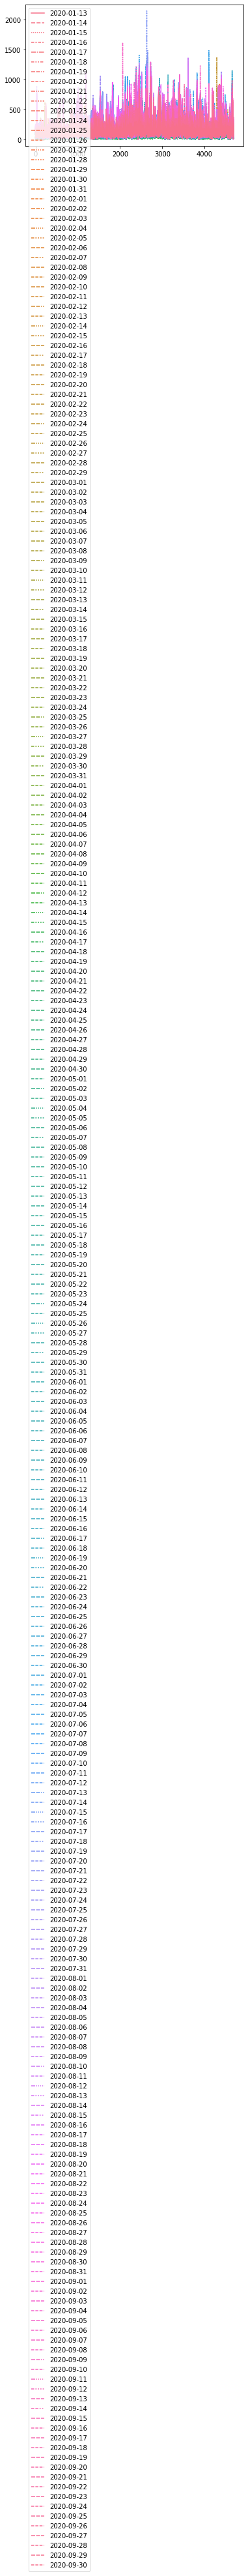

In [3]:
import seaborn as sns
sns.lineplot(data=appletrackingdata)

In [4]:
import pandas as pd
from scipy import stats
employment_national_data = pd.read_csv('/content/drive/My Drive/c3ai_datasets/Employment Combined - National - Daily.csv')

In [5]:
list(employment_national_data.columns)

['year',
 'month',
 'day',
 'emp_combined',
 'emp_combined_inclow',
 'emp_combined_incmiddle',
 'emp_combined_inchigh',
 'emp_combined_ss40',
 'emp_combined_ss60',
 'emp_combined_ss65',
 'emp_combined_ss70',
 'emp_combined_inclow_advance']

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualization
from scipy import stats

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

In [7]:
employment_national_data.head(10)
# employment_national_data.shape
# employment_national_data.info()

,year,month,day,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,emp_combined_inclow_advance
0,2020,1,15,-.000151,-0.002460,-.000602,.0027,.000104,.00165,-.000133,-.0021,0
1,2020,1,16,-.000166,-0.002240,-.000324,.00191,.0000192,.00125,-.000134,-.00238,0
2,2020,1,17,-.000174,-0.001990,-.0000457,.00112,-.0000445,.000859,-.000135,-.00267,0
3,2020,1,18,-.000148,-0.001580,.000232,.00033,-.0000522,.000454,-.000136,-.00273,0
4,2020,1,19,-.000123,-0.001180,.000511,-.000462,-.0000599,.0000504,-.000137,-.00279,0
5,2020,1,20,-.0000964,-0.000774,.000789,-.00125,-.0000668,-.000353,-.000138,-.00286,0
6,2020,1,21,-.000151,-0.000729,.00107,-.00204,-.000154,-.000773,-.000182,-.00331,0
7,2020,1,22,-.000199,-0.000658,.00134,-.00284,-.000222,-.00119,-.000228,-.00375,0
8,2020,1,23,.000211,-0.000261,.00195,-.00279,.0000549,-.000894,.000275,-.00262,0
9,2020,1,24,.00062,0.000125,.00255,-.00275,.000323,-.000603,.000767,-.00146,0


In [8]:
employment_national_data.tail(10)
employment_national_data = employment_national_data[:-53]  # exclude last 53 rows with incomplete data
employment_national_data

,year,month,day,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,emp_combined_inclow_advance
0,2020,1,15,-.000151,-0.00246,-.000602,.0027,.000104,.00165,-.000133,-.0021,0
1,2020,1,16,-.000166,-0.00224,-.000324,.00191,.0000192,.00125,-.000134,-.00238,0
2,2020,1,17,-.000174,-0.00199,-.0000457,.00112,-.0000445,.000859,-.000135,-.00267,0
3,2020,1,18,-.000148,-0.00158,.000232,.00033,-.0000522,.000454,-.000136,-.00273,0
4,2020,1,19,-.000123,-0.00118,.000511,-.000462,-.0000599,.0000504,-.000137,-.00279,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,2020,7,25,-.069,-0.16300,-.0555,-.0155,-.0816,-.0435,-.0759,-.174,0
193,2020,7,26,-.0686,-0.16200,-.055,-.0155,-.0813,-.0432,-.0755,-.173,0
194,2020,7,27,-.0683,-0.16200,-.0545,-.0155,-.0809,-.0429,-.0751,-.172,0
195,2020,7,28,-.0679,-0.16100,-.0539,-.0155,-.0806,-.0426,-.0746,-.171,0


In [9]:
list(employment_national_data.columns)

['year',
 'month',
 'day',
 'emp_combined',
 'emp_combined_inclow',
 'emp_combined_incmiddle',
 'emp_combined_inchigh',
 'emp_combined_ss40',
 'emp_combined_ss60',
 'emp_combined_ss65',
 'emp_combined_ss70',
 'emp_combined_inclow_advance']

In [10]:
employment_national_data.tail(10)

,year,month,day,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,emp_combined_inclow_advance
187,2020,7,20,-.0693,-0.163,-.0569,-.0137,-.0821,-.043,-.076,-.175,0
188,2020,7,21,-.0697,-0.163,-.057,-.0146,-.0823,-.0436,-.0765,-.176,0
189,2020,7,22,-.07,-0.164,-.057,-.0156,-.0826,-.0443,-.077,-.177,0
190,2020,7,23,-.0697,-0.163,-.0565,-.0156,-.0823,-.044,-.0767,-.176,0
191,2020,7,24,-.0693,-0.163,-.056,-.0156,-.0819,-.0438,-.0763,-.175,0
192,2020,7,25,-.069,-0.163,-.0555,-.0155,-.0816,-.0435,-.0759,-.174,0
193,2020,7,26,-.0686,-0.162,-.055,-.0155,-.0813,-.0432,-.0755,-.173,0
194,2020,7,27,-.0683,-0.162,-.0545,-.0155,-.0809,-.0429,-.0751,-.172,0
195,2020,7,28,-.0679,-0.161,-.0539,-.0155,-.0806,-.0426,-.0746,-.171,0
196,2020,7,29,-.0675,-0.161,-.0534,-.0155,-.0802,-.0423,-.0742,-.17,0


In [15]:
### Feature sleection for the model
#Considering only few features
X = employment_national_data.iloc[:, 1:10].values
X
### Get all the features columns except the first and last
features = list(employment_national_data.columns)[1:-2]
# features
# # ### Get the features data
data = employment_national_data[features]
# data

In [12]:
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

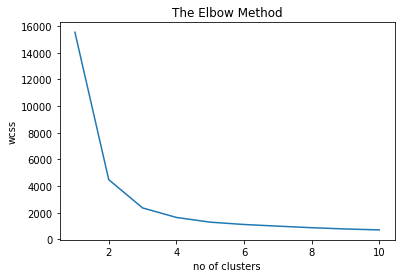

In [13]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
## elbow k=3

#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
data['cluster'] = y_kmeans
data.head(10)
#Lets analyze the clusters
# data.groupby(['cluster']).mean()

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . it is used in BFS industry(credit card) and retail for customer segmenattion.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,day,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,cluster
0,1,15,-.000151,-0.002460,-.000602,.0027,.000104,.00165,-.000133,2
1,1,16,-.000166,-0.002240,-.000324,.00191,.0000192,.00125,-.000134,2
2,1,17,-.000174,-0.001990,-.0000457,.00112,-.0000445,.000859,-.000135,2
3,1,18,-.000148,-0.001580,.000232,.00033,-.0000522,.000454,-.000136,2
4,1,19,-.000123,-0.001180,.000511,-.000462,-.0000599,.0000504,-.000137,2
5,1,20,-.0000964,-0.000774,.000789,-.00125,-.0000668,-.000353,-.000138,2
6,1,21,-.000151,-0.000729,.00107,-.00204,-.000154,-.000773,-.000182,2
7,1,22,-.000199,-0.000658,.00134,-.00284,-.000222,-.00119,-.000228,1
8,1,23,.000211,-0.000261,.00195,-.00279,.0000549,-.000894,.000275,1
9,1,24,.00062,0.000125,.00255,-.00275,.000323,-.000603,.000767,1


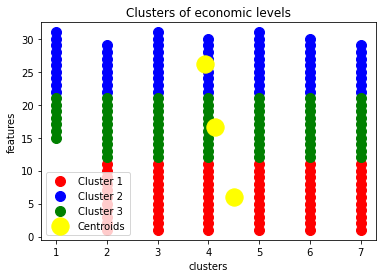

In [17]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of economic levels')
plt.xlabel('clusters')
plt.ylabel('features')
plt.legend()
plt.show()